# **Tableau de bord RH(2006-2018)** 

**0 - Importation des bibliothèques pour l'analyse de données et la visualisation**

In [4]:
#importing Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1 : Chargement et Exploration Initiale des Données**

In [5]:
#Chemin vers le fichier CSV
file_path = r'C:\Users\abdou\Desktop\BI TB\HR_Power_BI_Dashboard\HRData_py.csv'

#Lecture du fichier CSV
df = pd.read_csv(file_path)

**2 : Analyse des Effectifs du Personnel**

*2-1 : Calcule- Analyse des Effectifs du Personnel*

In [9]:
#Head Count (Nombre total d'employés)
head_count = df['EmployeeID'].count()
#Active Count (Nombre d'employés actifs) & %
active_count = df[df['EmploymentStatus'] == 'Active']['EmployeeID'].count()
percent_active = (active_count / head_count) * 100 if head_count > 0 else 0

#Terminated Count (Nombre d'employés actifs) & %
Terminated_count = df[df['EmploymentStatus'].isin(['Voluntarily Terminated', 'Terminated for Cause'])]['EmployeeID'].count()
percent_Terminated = (Terminated_count / head_count) * 100 if head_count > 0 else 0

## Calculer l'ancienneté en mois-------------------------
#  Convertir les dates au format datetime
df['HiringDate'] = pd.to_datetime(df['HiringDate'], errors='coerce')
df['TerminationDate'] = pd.to_datetime(df['TerminationDate'], errors='coerce')
# Fonction pour calculer l'ancienneté en mois
def calculate_tenure(row):
    if pd.notnull(row['TerminationDate']):  # Vérifier si la date de fin existe
        return (row['TerminationDate'] - row['HiringDate']).days // 30.63  # Convertir jours en mois (moyenne des jours par mois)
    return None  # Ignorer si pas de date de fin pour les Actifs

# Appliquer la fonction et créer la colonne "Tenure_Months"
terminated_employees = df[df['EmploymentStatus'].isin(['Voluntarily Terminated', 'Terminated for Cause'])].copy()
terminated_employees['Tenure_Months'] = terminated_employees.apply(calculate_tenure, axis=1)
# Calculer la moyenne de l'ancienneté des employés terminés
average_tenure = terminated_employees['Tenure_Months'].mean()

#Male Count (Nombre d'employés actifs) & % -------------------
Male_count = df[df['Gender'] == 'M ']['EmployeeID'].count()
Percent_Male = (Male_count/head_count)*100 if head_count > 0 else 0
#Female Count (Nombre d'employés actifs) & %
Female_count = df[df['Gender'] == 'F']['EmployeeID'].count()
Percent_Female = (Female_count/head_count)*100 if head_count > 0 else 0
#Affichage des résultats
print("===========================")
print("Tableau 1 : Répartition par Genre et Statut")
print("--------------------------------")
print(f"Effectif total: {head_count}")
print(f"Employés actifs: {active_count} ({percent_active:.2f}%)")
print(f"Employés Départs: {Terminated_count} ({percent_Terminated:.2f}%)")
print(f"Hommes: {Male_count} ({Percent_Male:.2f}%)")
print(f"Femmes: {Female_count} ({Percent_Female:.2f}%)")
print("===========================")
print(f"La moyenne de l'ancienneté des employés terminés (en mois) est : {average_tenure:.2f} mois")
print("===========================")

Tableau 1 : Répartition par Genre et Statut
--------------------------------
Effectif total: 311
Employés actifs: 207 (66.56%)
Employés Départs: 104 (33.44%)
Hommes: 135 (43.41%)
Femmes: 176 (56.59%)
La moyenne de l'ancienneté des employés terminés (en mois) est : 40.76 mois


**Analyse :**
*Une grande majorité des employés (66,56%) est encore active, avec une légère prédominance féminine (56,59%). Cela suggère une bonne dynamique d'engagement et une possible culture d'inclusion au sein de l'entreprise.*

*2-2 : Représentation Graphique - Analyse des Effectifs du Personnel*

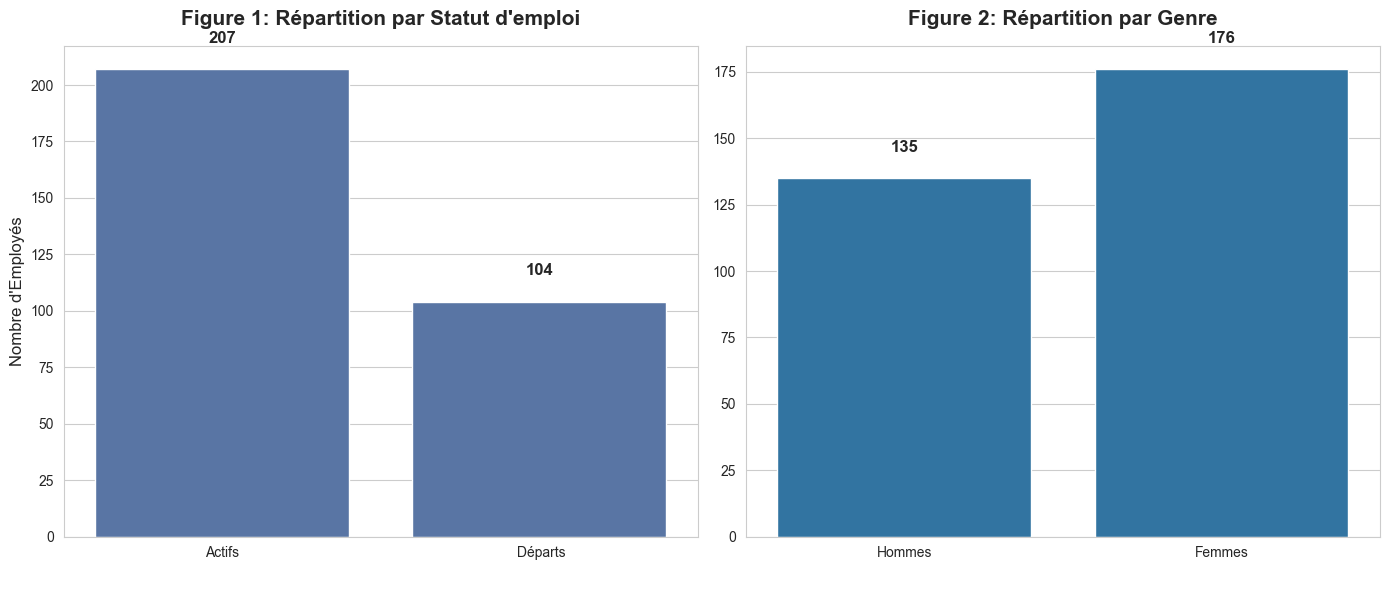

In [7]:
# Configuration initiale
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Création d'une grille 1x2
plt.subplots_adjust(wspace=0.3)  # Espace entre les graphiques

# Graphique 1: Statut des employés
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=['Actifs', ' Départs'], y=[active_count, Terminated_count], 
                 color='#4c72b0')  # Définir la couleur directement ici
ax1.set_title('Figure 1: Répartition par Statut d\'emploi', fontsize=15, pad=15, fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Nombre d\'Employés', fontsize=12)

for i, count in enumerate([active_count, Terminated_count]):
    ax1.text(i, count + max(active_count, Terminated_count)*0.05, f'{count}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Graphique 2: Répartition par genre
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=['Hommes', 'Femmes'], y=[Male_count, Female_count], 
                 color='#1f77b4')  # Définir la couleur directement ici
ax2.set_title('Figure 2: Répartition par Genre', fontsize=15, pad=15, fontweight='bold')
ax2.set_xlabel(' ')
ax2.set_ylabel('')  # Supprimer le label y pour éviter la répétition

for i, count in enumerate([Male_count, Female_count]):
    ax2.text(i, count + max(Male_count, Female_count)*0.05, f'{count}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show() # Afficher le graphique après l'exportation (optionnel)

**3 :Analyse des Statuts Matrimoniaux du Personnel**

*3-1 : Calcule Analyse des Statuts Matrimoniaux du Personnel*

In [8]:
# Calcul des effectifs par statut matrimonial
Single_count = df[df['MaritalStatus'] == 'Single']['EmployeeID'].count()
Married_count = df[df['MaritalStatus'] == 'Married']['EmployeeID'].count()
Divorced_count = df[df['MaritalStatus'] == 'Divorced']['EmployeeID'].count()
Separated_count = df[df['MaritalStatus'] == 'Separated']['EmployeeID'].count()
Windowed_count = df[df['MaritalStatus'] == 'Widowed']['EmployeeID'].count()

# Affichage des résultats
print("===========================")
print("Tableau 2 :RÉPARTITION PAR STATUT MATRIMONIAL:")
print("--------------------------------")
print(f"Célibataire: {Single_count} employees")
print(f"Mariés: {Married_count} employees")
print(f"Divorcés: {Divorced_count} employees")
print(f"Séparés: {Separated_count} employees")
print(f"Veufs/Veuves: {Windowed_count} employees")
print("===========================")

Tableau 2 :RÉPARTITION PAR STATUT MATRIMONIAL:
--------------------------------
Célibataire: 137 employees
Mariés: 124 employees
Divorcés: 30 employees
Séparés: 12 employees
Veufs/Veuves: 8 employees


**Analyse :**
*La majorité des employés sont célibataires (44,12%) suivis par les mariés (39,87%). Ces informations peuvent être utilisées pour adapter les politiques de bien-être et les avantages sociaux en fonction des profils personnels des employés.*

*3-2 : Représentation Graphique - Analyse des Statuts Matrimoniaux du Personnel*

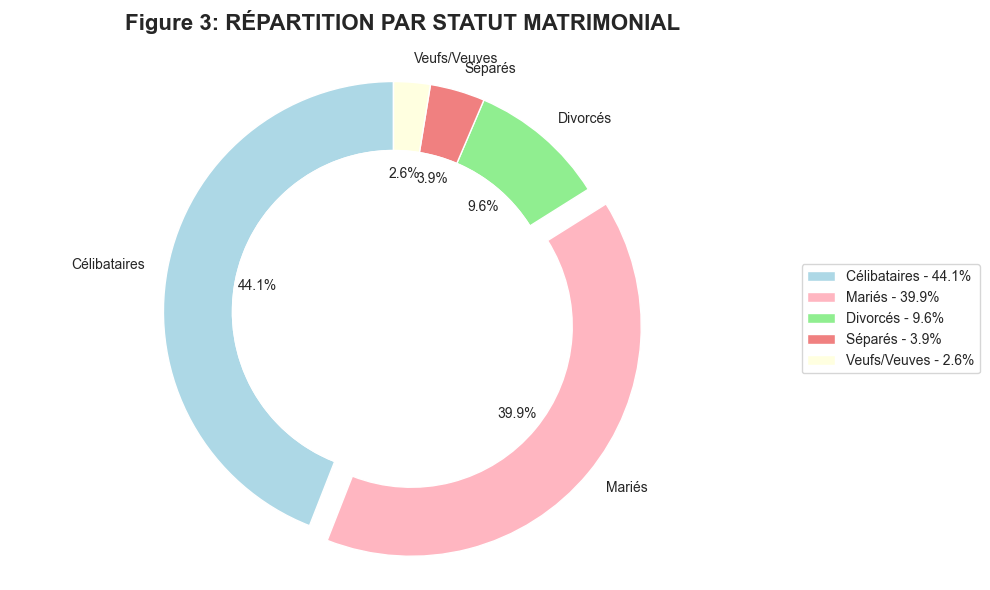

In [10]:
plt.figure(figsize=(10, 6))
labels = ['Célibataires', 'Mariés', 'Divorcés', 'Séparés', 'Veufs/Veuves']
sizes = [Single_count, Married_count, Divorced_count, Separated_count, Windowed_count]
colors = ['lightblue', 'lightpink', 'lightgreen', 'lightcoral', 'lightyellow']
explode = (0, 0.1, 0, 0, 0)

wedges, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
                                  autopct='%1.1f%%', startangle=90, 
                                  wedgeprops=dict(width=0.3, edgecolor='w'))

legend_labels = [f"{label} - {size/sum(sizes)*100:.1f}%" for label, size in zip(labels, sizes)]
plt.legend(wedges, legend_labels, title="", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.axis('equal')
plt.title('Figure 3: RÉPARTITION PAR STATUT MATRIMONIAL', fontsize=16, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()